In [76]:
import os 
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

In [78]:
def Q_QR(df= None , x_col= None, y_col=None,output_dir= None,quarters=None):
  """
    Estimate quantile on quantile regression paramaters for a given two variables.
    
    Parameters:
    -----------
    df : pandas DataFrame, default None
        DataFrame containing the data.
    x : str, default None
        Column name for the independent variable.
    y : str, default None
        Column name for the dependent variable.
    path : str, default None
        Path to directory where the CSV output files will be saved.
    quarters : list, default None
        List of quantile levels between 0 and 1.
        
    Returns:
    --------
    A tuple containing the slope and intercept matrices for each quantile on quantile regression.
  """
  pd.options.mode.chained_assignment = None

  # Create a copy of the relevant columns of the DataFrame
  df1=df[[x_col,y_col]]

  # Create empty lists for the slope and intercept results
  slope_results = []
  intrcept_results = []

  # Create a range of quantiles values dor  independant variable
  xx = np.linspace(min(df1[x_col]),max(df1[x_col]),len(quarters))

  # Estimate quantile  on quantils regression parameters
  for q in(quarters):
    slopes = []
    intercepts = []
    for i in range(len(xx)):
          df1['z']= df1[x_col]-xx[i]
          r = smf.quantreg(f'{y_col}~z',df1)
          reg=r.fit(q=q)
          slopes.append(reg.params["z"])
          intercepts.append(reg.params['Intercept'])
    slope_results.append(slopes)
    intrcept_results.append(intercepts)
  matrix_slope = np.array(slope_results).T 
  matrix_intercept = np.array(intrcept_results).T

  # Save estimated parameters in .csv file
  pd.DataFrame(matrix_slope).to_csv(output_dir+'\\slopes.csv')
  pd.DataFrame(matrix_intercept).to_csv(output_dir+'\\intercepts.csv')

  return matrix_slope ,matrix_intercept

In [90]:
def plot_surface (slopes = None, interceps = None, quarters = None, output_dir = None,x_lable = None , y_lable =None):
    """
    Plots the surface of the coefficients obtained from quantile-on-quantile regression.
    Parameters:
    -----------
    slopes : array-like, default None
        The slopes of the quantile-on-quantile regression coefficients.
    intercepts : array-like, default None
        The intercepts of the quantile-on-quantile regression coefficients.
    quarters : array-like, default None
        The array of quantile levels used for the regression.
    output_dir : str, default None
        The output diractory where the plot image will be saved.
    x_lable : str,  default None
        The name of the x_axis.
    y_lable : str,  default None
        The name of the y_axis.
    """   
    
    X, Y = np.meshgrid(quarters, quarters) 
    # Create a figure with two subplots
    fig, axes = plt.subplots(ncols=2, figsize=(10,5), subplot_kw={'projection': '3d'})

    # Add data to the subplots
    surf1 = axes[0].plot_surface(X, Y, slopes, cmap='coolwarm')
    surf2 = axes[1].plot_surface(X, Y, interceps, cmap='coolwarm')

    # Add color bars to the subplots
    fig.colorbar(surf1, ax=axes[0], shrink=0.6,pad = 0.1)
    fig.colorbar(surf2, ax=axes[1], shrink=0.6,pad =0.1)
    
    # Add xlable and ylabel for each subplot
    axes[0].set_xlabel(f'{x_lable}_Quartiles')
    axes[0].set_ylabel(f'{y_lable}_Quartiles')
    axes[1].set_xlabel(f'{x_lable}_Quartiles')
    axes[1].set_ylabel(f'{y_lable}_Quartiles')

    # Add titles for each subplot
    axes[0].set_title('Slope')  
    axes[1].set_title('Intercept') 
     
     # Add a title for the entire figure
    fig.suptitle(f'Quantile-on-Quantile Process for the {x_lable} Coefficient',y = 0.9 , ha='center',va='bottom')

    # Save the figure
    fig.savefig(output_dir + f'\\qq_plot({x_lable}_{y_lable}).png')
    
    # Show the plot
    plt.show()


In [80]:
cwd = os.getcwd()
df = pd.read_csv('data.csv').drop(columns ='Unnamed: 0').set_index('date')

In [ ]:
quarters=np.arange(0.01,0.9,0.05)
slopes,interceptes = Q_QR(df = df,x_col='NGDP_R_SA_XDC_US',y_col='PCPI_IX_US', output_dir= cwd ,quarters=quarters)

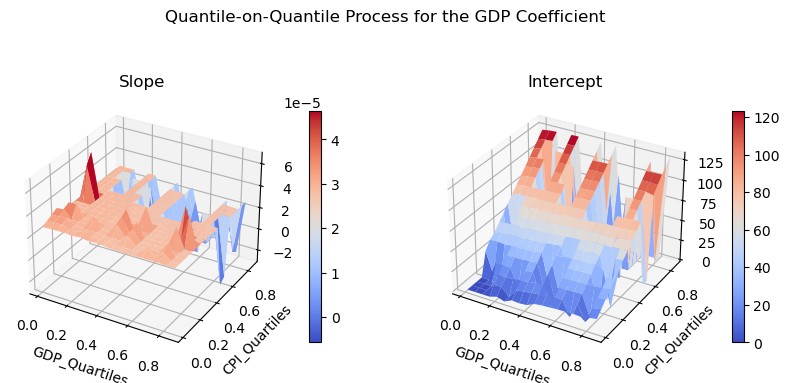

In [91]:
plot_surface( slopes=slopes , interceps=interceptes ,quarters=quarters,output_dir = cwd, x_lable='GDP', y_lable= 'CPI')